# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.015066e+01     7.020565e+00
 * time: 0.002530813217163086
     1     2.797190e+01     4.869396e+00
 * time: 0.011189937591552734
     2     1.860246e+01     3.674310e+00
 * time: 0.021710872650146484
     3     1.304201e+01     2.759769e+00
 * time: 0.03197479248046875
     4     1.177413e+01     2.756113e+00
 * time: 0.04022383689880371
     5     1.112390e+01     2.281377e+00
 * time: 0.04842495918273926
     6     9.985026e+00     1.275625e+00
 * time: 0.056697845458984375
     7     8.992434e+00     1.449706e+00
 * time: 0.06506681442260742
     8     8.530122e+00     7.490820e-01
 * time: 0.07342290878295898
     9     8.330845e+00     6.944235e-01
 * time: 0.08214497566223145
    10     8.266749e+00     1.342181e+00
 * time: 0.08874082565307617
    11     8.259257e+00     1.011355e+00
 * time: 0.09534001350402832
    12     8.129062e+00     6.501995e-01
 * time: 0.10412383079528809
    13     8.006468e+00     4.652344e-01
 * t

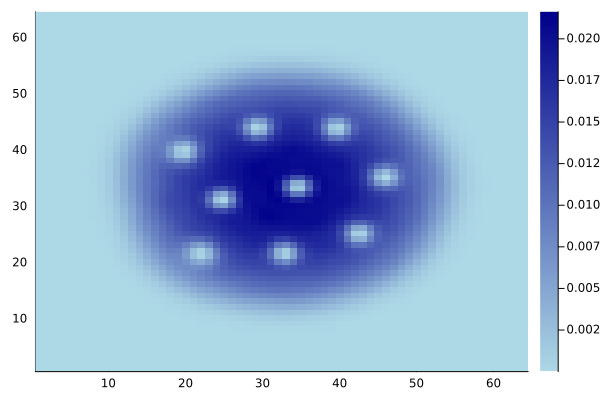

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)